In [2]:
import numpy as np
import pandas as pd
import os
os.chdir("C://Hello/csv_file")

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# Feature and target variable
X = df.drop('MEDV', axis=1)
Y = df['MEDV']

In [5]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

In [7]:
# build the Neural Network model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

C:\Users\shiva\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [9]:
# Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 648.9276 - mae: 23.5260 - val_loss: 572.6262 - val_mae: 22.4247
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 685.6938 - mae: 23.9986 - val_loss: 570.6261 - val_mae: 22.3801
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 633.1278 - mae: 23.1889 - val_loss: 568.4175 - val_mae: 22.3307
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 627.6240 - mae: 23.0309 - val_loss: 565.9259 - val_mae: 22.2748
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 621.3750 - mae: 22.7567 - val_loss: 563.1021 - val_mae: 22.2113
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 576.1100 - mae: 22.1549 - val_loss: 559.9188 - val_mae: 22.1396
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 630.1649 - mae: 23.0613 - val_loss: 556.3198 - val_mae: 22.0581
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 586.5073 - mae: 22.3107 - val_loss: 552.3465 - val_mae: 21.9679
Epoch 9/

In [10]:
#Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 68.2440 - mae: 5.9762
Test MAE: 6.082574367523193


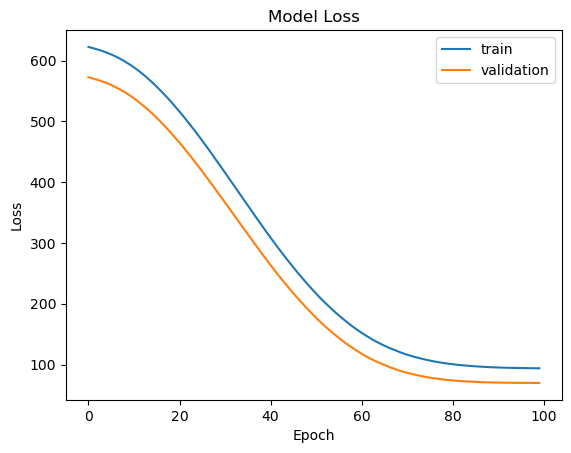

In [11]:
#Visualize traininig history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()